## Limit Cycle Example

This notebook plots temperature and pO2 evolution for a limit cycle regime that reproduces the geologic constraints on the Sturtian.

In [2]:
from model import *
from helpers import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# run the model

t_max=100
params = {'W_LIP':9,'tau':18,'V_C':8.5,'V_red':1.7,'PC_LIP':0.009}
results = run_model(t_max=t_max,**params,verbose=False)

In [4]:
# analyze timing

t = results["t"]
snowball = results["snowball"]
sb_starts, sb_ends, sb_durs, ig_durs = get_times(t, snowball)
print(f"First Snowball begins at {sb_starts[0]:0.2f} Myr")
print(f"Last Snowball ends after {(sb_ends[-1]-sb_starts[0]):0.2f} Myr")

First Snowball begins at 0.09 Myr
Last Snowball ends after 55.15 Myr


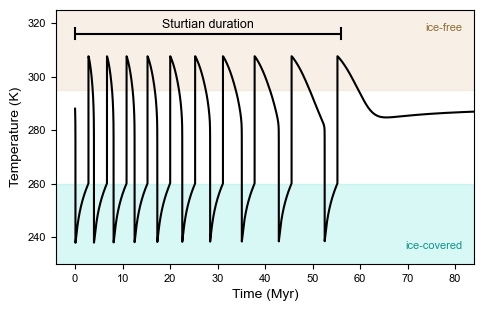

In [5]:
# temperature plot

fig = plt.figure(figsize=(4.18, 2.54))
ax = fig.add_axes([0, 0, 1, 1])

t = results['t']
T = results['T']
ax.plot(t, T, c='k', alpha=1)

# teal and tan
Ti, To = results['Ti'][0], results['To'][0]
ax.axhspan(To, 340, alpha=0.2, color='burlywood')
ax.axhspan(220, Ti, alpha=0.2, color='turquoise')
ax.set_ylim(230, 325)

# axis labels
ax.set_xlabel('Time (Myr)', fontsize=10)
ax.set_ylabel('Temperature (K)', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)

# set x limits
t_max = 80
xmin, xmax = 0, t_max
margin = 0.05 * (xmax - xmin)
ax.set_xlim(xmin - margin, xmax + margin)

# "ice-free" and "ice-covered" labels
xlim = ax.get_xlim()
ylim = ax.get_ylim()
padding = xlim[1] * 0.03
text_x = xlim[1] - padding
ax.text(text_x, ylim[0] + 5, "ice-covered", c='#10948a', ha='right', va='bottom', fontsize=8)
ax.text(text_x, ylim[1] - 5, "ice-free", c='#8b6d32', ha='right', va='top', fontsize=8)

# Sturtian duration annotation
y = 316
tick_height = 2
ax.hlines(y, 0, 56, color='k')
ax.plot([0, 0], [y - tick_height, y + tick_height], c='k')
ax.plot([56, 56], [y - tick_height, y + tick_height], c='k')
ax.text(28, y + 1, "Sturtian duration", ha='center', va='bottom', fontsize=9)

plt.savefig('figs/limit_cycle_example.pdf', format='pdf', bbox_inches='tight')
plt.show()

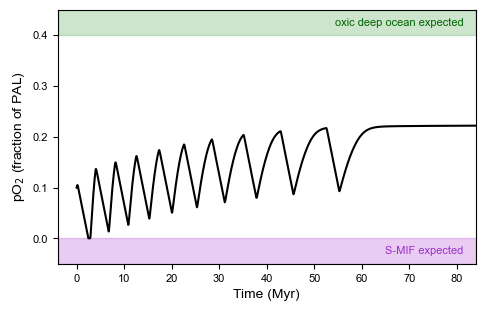

In [6]:
# O2 plot

fig = plt.figure(figsize=(4.18, 2.54))
ax = fig.add_axes([0, 0, 1, 1])

t = results['t']
pO2 = results['pO2']
ax.plot(t, pO2, c='k', alpha=1)

# axis labels and ticks
ax.set_xlabel('Time (Myr)', fontsize=10)
ax.set_ylabel('pO$_2$ (fraction of PAL)', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)

# axes limits
t_max = 80
xmin, xmax = 0, t_max
margin = 0.05 * (xmax - xmin)
ax.set_xlim(xmin - margin, xmax + margin)
ax.set_ylim(-0.05, 0.45)

# horizontal bands and labels
xlim = ax.get_xlim()
ylim = ax.get_ylim()
padding = xlim[1] * 0.03
text_x = xlim[1] - padding

# S-MIF threshold
SMIF_threshold = (2.1 / 1e6) / 0.2  # ppm to fraction of PAL
ax.axhspan(ylim[0], SMIF_threshold, color='mediumorchid', alpha=0.3)
ax.text(text_x, -0.025, 'S-MIF expected', color='darkorchid', ha='right', va='center', fontsize=8)

# oxic deep ocean threshold
ax.axhspan(0.4, ylim[1], color='green', alpha=0.2)
ax.text(text_x, 0.425, 'oxic deep ocean expected', color='darkgreen', ha='right', va='center', fontsize=8)

plt.savefig('figs/limit_cycle_O2.pdf', format='pdf', bbox_inches='tight')
plt.savefig('figs_poster/limit_cycle_O2.png', format='png', bbox_inches='tight', dpi=300, transparent=True)

plt.show()

In [7]:
def mask_snowball_times(var, snowball):
    sb_arr = np.ma.masked_array(var, mask=~snowball)
    ig_arr = np.ma.masked_array(var, mask=snowball)
    return sb_arr, ig_arr

Total LIP volume used: 8.8 Mkm3
Total LIP height used: 2.0 km
Initial P_eff required: 200 m/Myr


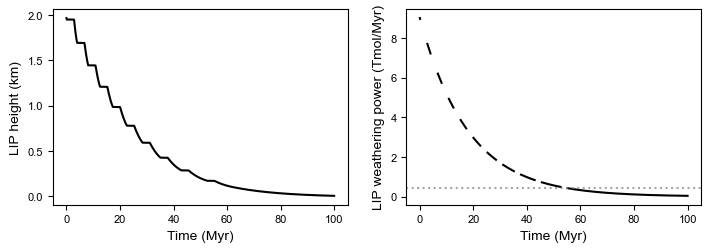

In [8]:
# LIP volume/height analysis and WLIP0 subplot figure

# compute LIP height time series
t = results['t']
t_lip, vol, height = LIP_volume(results, A0=4.45)

# make side-by-side panels
fig, axes = plt.subplots(1, 2, figsize=(8.36, 2.54))

# left: LIP height
ax = axes[0]
max_height = np.max(height) / 1e3
ax.plot(t_lip, max_height - height / 1e3, c='k', alpha=1)
ax.set_xlabel('Time (Myr)', fontsize=10)
ax.set_ylabel('LIP height (km)', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)
#ax.set_title('A', fontweight='bold', fontsize=12, loc='left', pad=4)

# right: WLIP0
ax2 = axes[1]
Cimb_arr = results['W_LIP0'] * np.exp(-t / results['tau'][0])
sb_arr, ig_arr = mask_snowball_times(Cimb_arr, results['snowball'])
ax2.plot(t, ig_arr, c='k', alpha=1, label='During interglacials')
ax2.axhline(0.45, color='grey', linestyle=':', alpha=0.7)
ax2.set_xlabel('Time (Myr)', fontsize=10)
ax2.set_ylabel('LIP weathering power (Tmol/Myr)', fontsize=10)
ax2.tick_params(axis='both', which='major', labelsize=8)
#ax2.set_title('B', fontweight='bold', fontsize=12, loc='left', pad=4)

# save combined figure
plt.savefig('figs/supp/example_LIP_power.pdf', format='pdf', bbox_inches='tight', dpi=600)

plt.show()

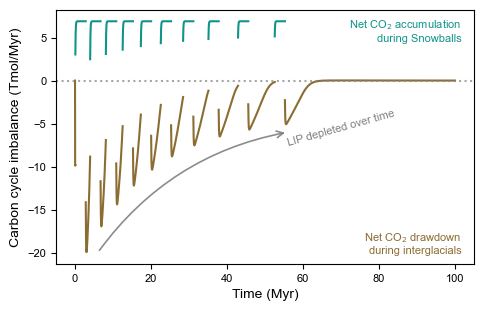

In [9]:
fig = plt.figure(figsize=(4.18, 2.54))
ax = fig.add_axes([0, 0, 1, 1])

sb_arr, ig_arr = mask_snowball_times(results['dNdt'], results['snowball'])

ax.plot(t,ig_arr, c='#8b6d32', alpha=1, label='During interglacials')
ax.plot(t,sb_arr, c='#10948a', alpha=1, label='During Snowballs')

ax.axhline(0, color='grey', linestyle=':', alpha=0.7)

# axis labels and ticks
ax.set_xlabel('Time (Myr)', fontsize=10)
ax.set_ylabel('Carbon cycle imbalance (Tmol/Myr)', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)
#ax.legend(fontsize=8, loc='lower right')

# Corner annotations
xlim = ax.get_xlim()
ylim = ax.get_ylim()
pad_x = 0.03 * (xlim[1] - xlim[0])
pad_y = 0.03 * (ylim[1] - ylim[0])
ax.text(xlim[1] - pad_x, ylim[1] - pad_y, 'Net CO$_2$ accumulation\nduring Snowballs',
        ha='right', va='top', fontsize=8, color='#10948a')
ax.text(xlim[1] - pad_x, ylim[0] + pad_y, 'Net CO$_2$ drawdown\nduring interglacials',
        ha='right', va='bottom', fontsize=8, color='#8b6d32')

# Curved arrow annotation
from matplotlib.patches import FancyArrowPatch
import numpy as np
x0, y0 = 6, -20
x1, y1 = 56, -6
arrow = FancyArrowPatch((x0, y0), (x1, y1),
                         connectionstyle='arc3,rad=-0.2',
                         arrowstyle='->', mutation_scale=12,
                         linewidth=1.2, color='grey', alpha=0.9)
ax.add_patch(arrow)
angle = np.degrees(np.arctan2(y1 - y0, x1 - x0))
ax.text(x1, y1 - 1.2, 'LIP depleted over time', ha='left', va='center',
        fontsize=8, color='grey', rotation=angle, rotation_mode='anchor')

plt.savefig('figs/supp/limit_cycle_C_imbalance.pdf', format='pdf', bbox_inches='tight', dpi=600)
plt.show()